<a href="https://colab.research.google.com/github/Fcazarez/RRC3_UML_Ass5_Autoencoders/blob/main/UML_Ass5_Autoencoders_0378585_Felix_Cazarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning**
# **Assignement 5: Autoencoders**
## **Felix Cazarez**



### **Objective:**
To store a set of images using a minimal amount of data.

### **Data:**
Obtained from Arabic Handwritten Digits Dataset | Kaggle , original source unknown.
https://www.kaggle.com/datasets/mloey1/ahdd1


### **Problem Statement:**
You are working with a team that is developing a mobile app for doing arithmetic by hand, in Arabic. The app will recognize digits in the user's handwriting as part of its functionality. In order to use a minimum amount of data, your job as a developer is to store each hand-drawn digit using as little memory as possible. Using a dataset of hand drawn Arabic digits, you will train an autoencoder to encode and decode these images.

### **Arabic Digits:**
Arabic digits correspond to Roman digits according to the table below (N.Das, A. Mollah, S. Saha, S. Haque, 2010, https://arxiv.org/abs/1003.1891):



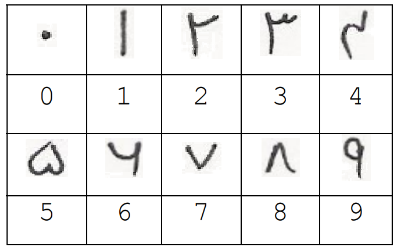

# **1. Data**
**a)** Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image.
* Load this data into a pandas dataframe.
* Convert the dataframe to a numpy array using pandas.values.
* Print the shape of the data.






In [ ]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False



In [ ]:
url = 'https://raw.githubusercontent.com/Fcazarez/RRC3_UML_Ass5_Autoencoders/main/csvTestImages%2010k%20x%20784.csv'
dataframe_df = pd.read_csv(url)
print(dataframe_df.head())
print('=='*30)
print("Shape of the dataframe: ", dataframe_df.shape)

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.538  0.539  0.540  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.541  0.542  0.543  0.544  0.545  0.546  0.547  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 784 columns]
Shape of the dataframe:  (9999, 784)


In [ ]:
# Convert the DataFrame to a NumPy array
data_np = dataframe_df.values

print(data_np)
print('=='*30)
print("Shape of the NumPy array: ", data_np.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of the NumPy array:  (9999, 784)


**b)** Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape.
* Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map.
* In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).

In [ ]:
# Normalize the values by dividing each element by 255
data_np_normalized = data_np / 255.0

In [ ]:
data_np_reshaped1 = data_np_normalized.reshape(-1, 28*2)
# Reshape the array to make each image 28 x 28
print("Shape of the reshaped array: ", data_np_reshaped1.shape)

Shape of the reshaped array:  (139986, 56)


In [ ]:
data_np_reshaped = data_np_reshaped1.reshape(-1, 28,28)
#data_np_reshaped2 = data_np_reshaped.reshape(-1, 28, 28)
print("Shape of the reshaped array: ", data_np_reshaped.shape)

Shape of the reshaped array:  (9999, 28, 28)


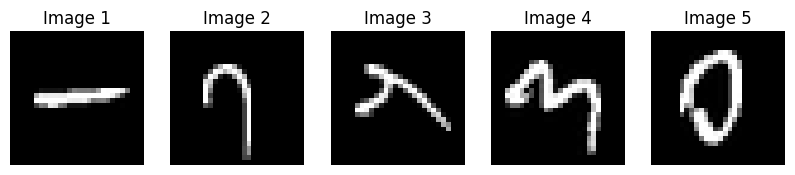

In [ ]:
# Plot the first five images using 'gray' colormap
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i in range(5):
    axes[i].imshow(data_np_reshaped[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.show()

In [ ]:
data = data_np_reshaped.reshape((-1, 28*2))
data.shape

(139986, 56)

# **2. Modeling**
**a)** Use keras.layers to create an input layer that matches the dimensions of your data.

**b)** Use keras.layers to create an encoding stage that has at least two layers and reduces the size of the data to 50% or less (less is better). You will need to choose activation functions.

**c)** Use keras.layers to create a decoding stage that has at least two layers and restores the data to its original size. You will need to choose activation functions.

**d)** Compile the complete autoencoder network. You will need to choose a loss function and an optimizer. Train the autoencoder using the image data.

**e)** Compile an encoder network from your trained input layer and encoding stage.



In [ ]:
input_layer = Input(shape=28*2)
encoder_layer1 = Dense(676, activation='relu')(input_layer)
encoder_layer2 = Dense(338, activation='relu')(encoder_layer1)
encoder_stage = Dense(169, activation='relu')(encoder_layer2)
decoder_layer1 = Dense(338, activation='relu')(encoder_stage)
decoder_layer2 = Dense(676, activation='relu')(decoder_layer1)
decoding_stage = Dense(28*2, activation='sigmoid')(decoder_layer2)
# Create the autoencoder model
autoencoder = Model(input_layer, decoding_stage)
# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
#autoencoder.compile(loss='binary_crossentropy',optimizer='adadelta')

In [ ]:
autoencoder.fit(data, data, epochs=5)

Epoch 1/5
4375/4375 [==============================] - 52s 12ms/step - loss: 0.0842
Epoch 2/5
4375/4375 [==============================] - 57s 13ms/step - loss: 0.0842
Epoch 3/5
4375/4375 [==============================] - 64s 15ms/step - loss: 0.0842
Epoch 4/5
4375/4375 [==============================] - 60s 14ms/step - loss: 0.0842
Epoch 5/5
4375/4375 [==============================] - 56s 13ms/step - loss: 0.0842


# **Conclusions**
**a)** Use matplotlib.plot.imshow and matplotlib.plot.subplot and your trained models to give a plot of the first five original images along the top row, the encoded versions of those same images along the second row, and the decoded versions along the bottom row. Return to question 2 and adjust the hyperparameters of your model until you are able to produce decoded images that represent the original images, with an encoding that uses as little data as possible; make a record of the adjustments you try in markdown.

**b)** Use markdown to describe how well the autoencoder is working, making reference to the plots.

**c)** State the amount of data needed to store a single image, considering that a floating-point number is 4 bytes of data. Calculate how much memory will be saved as a percentage.

Epoch 1/20
4375/4375 [==============================] - 127s 29ms/step - loss: 0.0054
Epoch 2/20
4375/4375 [==============================] - 163s 37ms/step - loss: 0.0017
Epoch 3/20
4375/4375 [==============================] - 156s 36ms/step - loss: 0.0014
Epoch 4/20
4375/4375 [==============================] - 149s 34ms/step - loss: 0.0012
Epoch 5/20
4375/4375 [==============================] - 156s 36ms/step - loss: 0.0011
Epoch 6/20
4375/4375 [==============================] - 138s 32ms/step - loss: 9.9746e-04
Epoch 7/20
4375/4375 [==============================] - 150s 34ms/step - loss: 9.2996e-04
Epoch 8/20
4375/4375 [==============================] - 147s 34ms/step - loss: 8.6748e-04
Epoch 9/20
4375/4375 [==============================] - 174s 40ms/step - loss: 8.1650e-04
Epoch 10/20
4375/4375 [==============================] - 191s 44ms/step - loss: 7.7684e-04
Epoch 11/20
4375/4375 [==============================] - 183s 42ms/step - loss: 7.3666e-04
Epoch 12/20
4375/4375 [=====

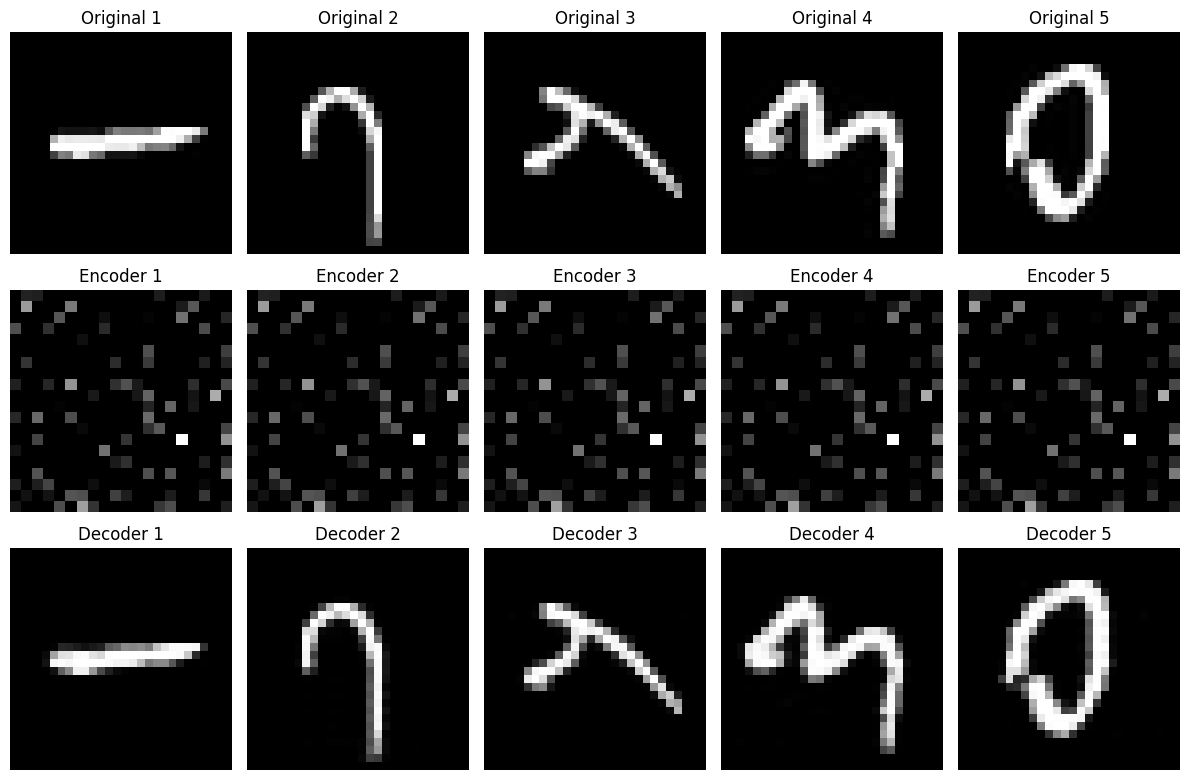

In [ ]:

# reshaping data
data = data_np_reshaped.reshape((-1, 28*2))

# Define the autoencoder model
input_layer = Input(shape=28*2)
encoder_layer1 = Dense(784, activation='relu')(input_layer)
encoder_layer2 = Dense(512, activation='relu')(encoder_layer1)
encoder_stage = Dense(400, activation='relu')(encoder_layer2)
decoder_layer1 = Dense(512, activation='relu')(encoder_stage)
decoder_layer2 = Dense(784, activation='relu')(decoder_layer1)
decoding_stage = Dense(28*2, activation='sigmoid')(decoder_layer2)

autoencoder = Model(input_layer, decoding_stage)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data, data, epochs=20)

# Get encoder and decoder outputs
encoder_output = Model(input_layer, encoder_stage).predict(data)
decoder_output = autoencoder.predict(data)

# Reshape outputs for visualization
encoder_output = encoder_output.reshape((-1, 20, 20)) * 255
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255
data = data.reshape((-1, 28, 28))

# Plot original, encoder output, and decoder output
plt.figure(figsize=(12, 8))
for i in range(5):
    # Plot original images with tags
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Plot encoder output with tags
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.title(f'Encoder {i+1}')
    plt.axis('off')

    # Plot decoder output with tags
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.title(f'Decoder {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/20
4375/4375 [==============================] - 142s 32ms/step - loss: 0.0844
Epoch 2/20
4375/4375 [==============================] - 139s 32ms/step - loss: 0.0842
Epoch 3/20
4375/4375 [==============================] - 205s 47ms/step - loss: 0.0842
Epoch 4/20
4375/4375 [==============================] - 303s 69ms/step - loss: 0.0842
Epoch 5/20
4375/4375 [==============================] - 307s 70ms/step - loss: 0.0842
Epoch 6/20
4375/4375 [==============================] - 358s 82ms/step - loss: 0.0842
Epoch 7/20
4375/4375 [==============================] - 329s 75ms/step - loss: 0.0842
Epoch 8/20
4375/4375 [==============================] - 281s 64ms/step - loss: 0.0842
Epoch 9/20
4375/4375 [==============================] - 306s 70ms/step - loss: 0.0842
Epoch 10/20
4375/4375 [==============================] - 265s 61ms/step - loss: 0.0842
Epoch 11/20
4375/4375 [==============================] - 229s 52ms/step - loss: 0.0842
Epoch 12/20
4375/4375 [=============================

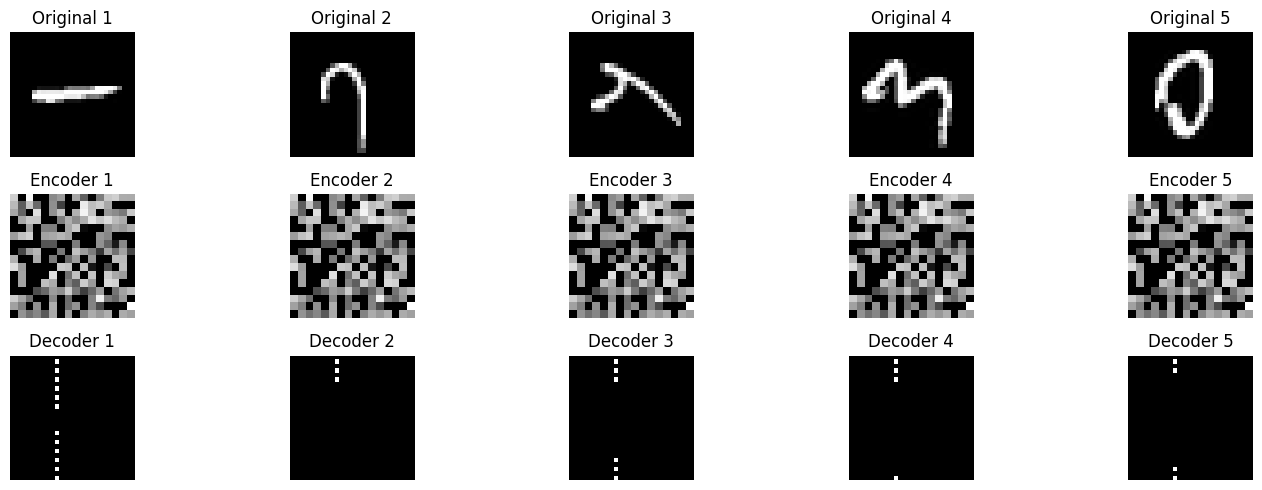

Epoch 1/20
4375/4375 [==============================] - 122s 27ms/step - loss: 0.0111
Epoch 2/20
4375/4375 [==============================] - 111s 25ms/step - loss: 0.0016
Epoch 3/20
4375/4375 [==============================] - 111s 25ms/step - loss: 0.0013
Epoch 4/20
4375/4375 [==============================] - 121s 28ms/step - loss: 0.0012
Epoch 5/20
4375/4375 [==============================] - 114s 26ms/step - loss: 0.0010
Epoch 6/20
4375/4375 [==============================] - 125s 28ms/step - loss: 9.5267e-04
Epoch 7/20
4375/4375 [==============================] - 124s 28ms/step - loss: 8.9707e-04
Epoch 8/20
4375/4375 [==============================] - 130s 30ms/step - loss: 8.4681e-04
Epoch 9/20
4375/4375 [==============================] - 122s 28ms/step - loss: 7.9326e-04
Epoch 10/20
4375/4375 [==============================] - 119s 27ms/step - loss: 7.6593e-04
Epoch 11/20
4375/4375 [==============================] - 131s 30ms/step - loss: 7.2930e-04
Epoch 12/20
4375/4375 [=====

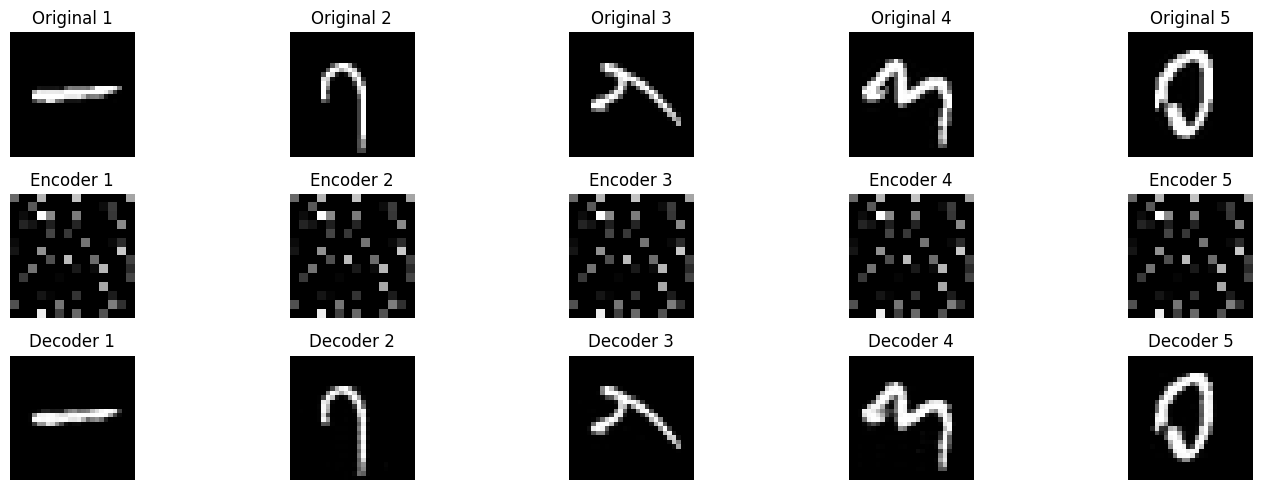

Epoch 1/20
4375/4375 [==============================] - 34s 7ms/step - loss: 0.0059
Epoch 2/20
4375/4375 [==============================] - 38s 9ms/step - loss: 0.0013
Epoch 3/20
4375/4375 [==============================] - 45s 10ms/step - loss: 0.0010
Epoch 4/20
4375/4375 [==============================] - 44s 10ms/step - loss: 9.1749e-04
Epoch 5/20
4375/4375 [==============================] - 41s 9ms/step - loss: 8.4998e-04
Epoch 6/20
4375/4375 [==============================] - 43s 10ms/step - loss: 8.1031e-04
Epoch 7/20
4375/4375 [==============================] - 44s 10ms/step - loss: 7.5632e-04
Epoch 8/20
4375/4375 [==============================] - 65s 15ms/step - loss: 7.3272e-04
Epoch 9/20
4375/4375 [==============================] - 68s 16ms/step - loss: 6.9609e-04
Epoch 10/20
4375/4375 [==============================] - 74s 17ms/step - loss: 6.7204e-04
Epoch 11/20
4375/4375 [==============================] - 45s 10ms/step - loss: 6.5289e-04
Epoch 12/20
4375/4375 [===========

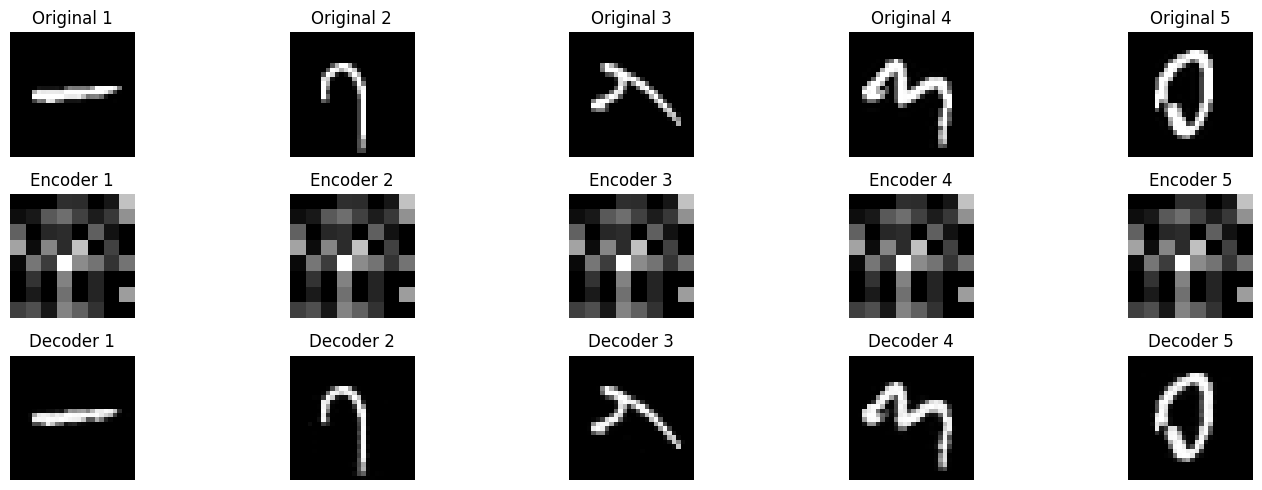

Epoch 1/20
4375/4375 [==============================] - 18s 4ms/step - loss: 0.0118
Epoch 2/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0037
Epoch 3/20
4375/4375 [==============================] - 16s 4ms/step - loss: 0.0027
Epoch 4/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0023
Epoch 5/20
4375/4375 [==============================] - 16s 4ms/step - loss: 0.0020
Epoch 6/20
4375/4375 [==============================] - 21s 5ms/step - loss: 0.0018
Epoch 7/20
4375/4375 [==============================] - 20s 5ms/step - loss: 0.0017
Epoch 8/20
4375/4375 [==============================] - 23s 5ms/step - loss: 0.0016
Epoch 9/20
4375/4375 [==============================] - 21s 5ms/step - loss: 0.0015
Epoch 10/20
4375/4375 [==============================] - 18s 4ms/step - loss: 0.0014
Epoch 11/20
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0014
Epoch 12/20
4375/4375 [==============================] - 15s 4ms/step - lo

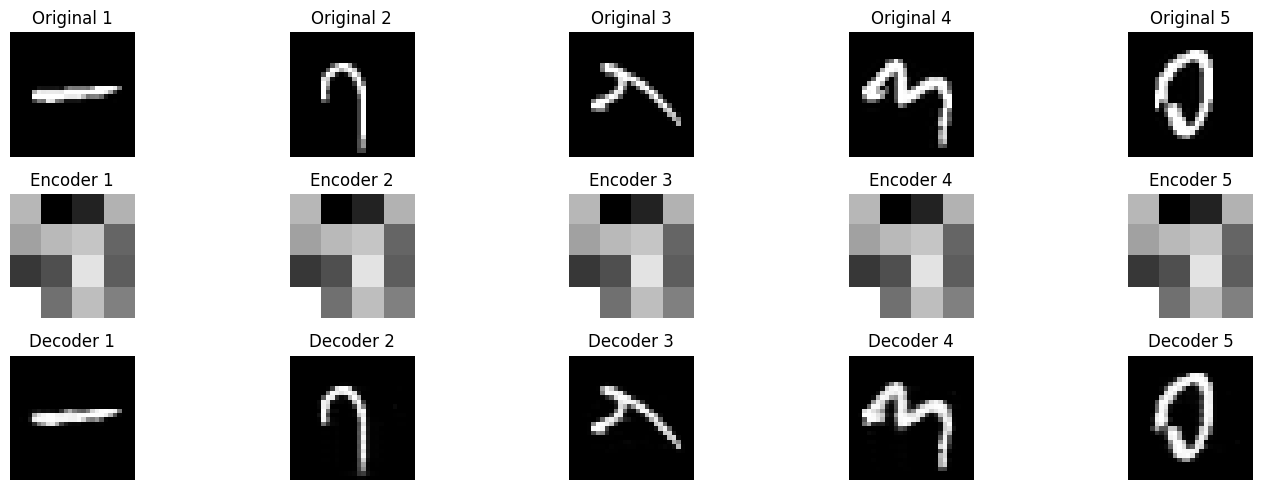

Epoch 1/20
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0210
Epoch 2/20
4375/4375 [==============================] - 14s 3ms/step - loss: 0.0093
Epoch 3/20
4375/4375 [==============================] - 15s 3ms/step - loss: 0.0072
Epoch 4/20
4375/4375 [==============================] - 15s 3ms/step - loss: 0.0063
Epoch 5/20
4375/4375 [==============================] - 15s 4ms/step - loss: 0.0057
Epoch 6/20
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0053
Epoch 7/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0050
Epoch 8/20
4375/4375 [==============================] - 23s 5ms/step - loss: 0.0047
Epoch 9/20
4375/4375 [==============================] - 20s 4ms/step - loss: 0.0045
Epoch 10/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0043
Epoch 11/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0042
Epoch 12/20
4375/4375 [==============================] - 19s 4ms/step - lo

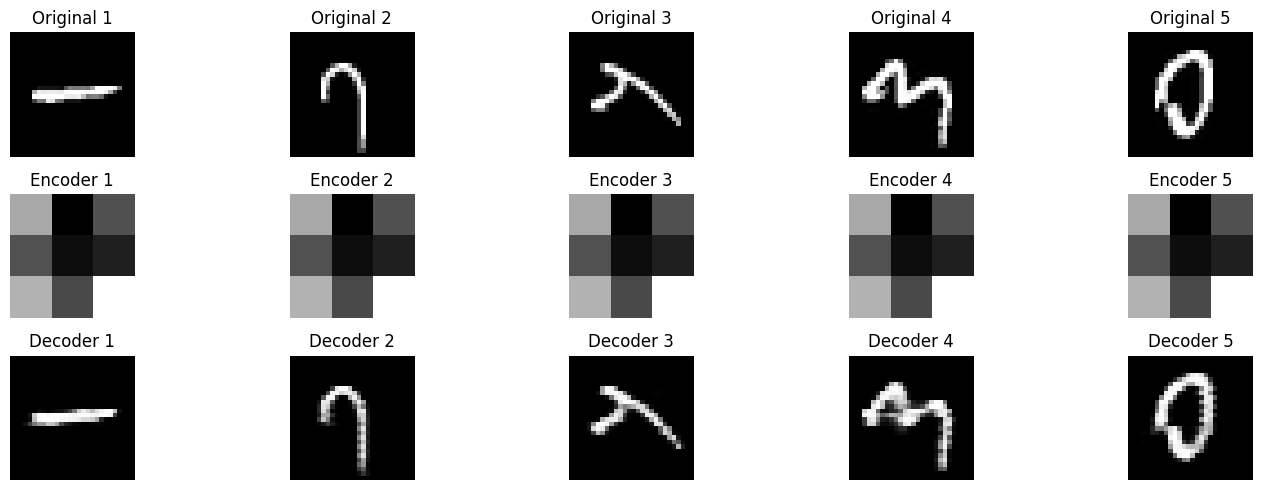

Epoch 1/20
4375/4375 [==============================] - 20s 4ms/step - loss: 0.0342
Epoch 2/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0203
Epoch 3/20
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0182
Epoch 4/20
4375/4375 [==============================] - 16s 4ms/step - loss: 0.0163
Epoch 5/20
4375/4375 [==============================] - 16s 4ms/step - loss: 0.0157
Epoch 6/20
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0151
Epoch 7/20
4375/4375 [==============================] - 13s 3ms/step - loss: 0.0146
Epoch 8/20
4375/4375 [==============================] - 13s 3ms/step - loss: 0.0142
Epoch 9/20
4375/4375 [==============================] - 13s 3ms/step - loss: 0.0139
Epoch 10/20
4375/4375 [==============================] - 13s 3ms/step - loss: 0.0137
Epoch 11/20
4375/4375 [==============================] - 14s 3ms/step - loss: 0.0135
Epoch 12/20
4375/4375 [==============================] - 14s 3ms/step - lo

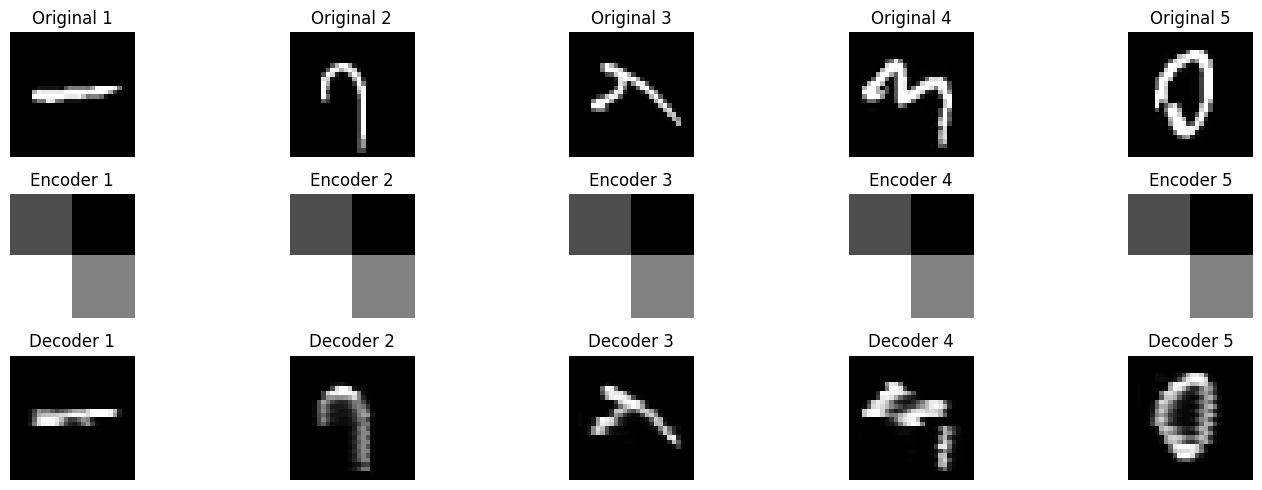

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

PIXELS = [16, 14, 8, 4, 3, 2]

# Assuming data_np_reshaped is your numpy array
data = data_np_reshaped.reshape((-1, 28*2))

for i in PIXELS:
    # Define the autoencoder model
    input_layer = Input(shape=28*2)
    encoder_layer1 = Dense(i*i*4, activation='relu')(input_layer)
    encoder_layer2 = Dense(i*i*2, activation='relu')(encoder_layer1)
    encoder_stage = Dense(i*i, activation='relu')(encoder_layer2)
    decoder_layer1 = Dense(i*i*2, activation='relu')(encoder_stage)
    decoder_layer2 = Dense(i*i*4, activation='relu')(decoder_layer1)
    decoding_stage = Dense(28*2, activation='sigmoid')(decoder_layer2)

    autoencoder = Model(input_layer, decoding_stage)

    # Compile the autoencoder model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(data, data, epochs=20)

    # Get encoder and decoder outputs
    encoder_output = Model(input_layer, encoder_stage).predict(data)
    decoder_output = autoencoder.predict(data)

    # Reshape outputs for visualization
    encoder_output = encoder_output.reshape((-1, i, i)) * 255
    decoder_output = decoder_output.reshape((-1, 28, 28)) * 255
    data_reshaped = data.reshape((-1, 28, 28))

    # Plot original, encoder output, and decoder output
    plt.figure(figsize=(15, 5))
    print(f"Pixel size: {i}")
    for j in range(5):
        # Plot original images with tags
        plt.subplot(3, 5, j + 1)
        plt.imshow(data_reshaped[j], cmap='gray')
        plt.title(f'Original {j+1}')
        plt.axis('off')

        # Plot encoder output with tags
        plt.subplot(3, 5, j + 6)
        plt.imshow(encoder_output[j], cmap='gray')
        plt.title(f'Encoder {j+1}')
        plt.axis('off')

        # Plot decoder output with tags
        plt.subplot(3, 5, j + 11)
        plt.imshow(decoder_output[j], cmap='gray')
        plt.title(f'Decoder {j+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


## **Comments:**

### Encoder Performance Analysis
#### Model Architecture Exploration
In the pursuit of optimal hyperparameters for an encoder-decoder architecture, a comprehensive exploration was undertaken. The encoder architecture, a critical component responsible for distilling information from the input data, was iteratively fine-tuned. Various configurations, including changes in the number of dense layers, pixel sizes, and epochs, optimizer, were systematically tested.

#### Impact of Hyperparameters on Model Performance
The model exhibited a promising trend where the reduction in pixel size contributed positively to the performance, even achieving satisfactory results with as few as 3 pixels. This reduction not only demonstrated resource efficiency but also allowed for a more dynamic training process and resource consumption.

The analysis revealed that higher pixel counts in dense layers incurred increased processing times. However, the trade-off between resource consumption and model efficacy became apparent, emphasizing the delicate balance in achieving optimal results.

#### Role of Optimizers in Model Convergence
The choice of optimizer played a pivotal role in the model's convergence behavior. Among the options explored, the Adam optimizer consistently outperformed others, yielding the lowest loss and thus substantiating its suitability for this specific task. this is the only one that allowed to have the decoded stage done.

#### Decoder Stage Sensitivity to Pixel Size
While experimenting with hyperparameters, it became evident that reducing the pixel size to a minimum of 3 pixels maintained decent results in the decoder stage. Further reduction proved counterproductive, leading to information loss and diminishing the model's overall effectiveness.

#### Training Dynamics and Information Preservation
The iterative refinement process showcased a compelling dynamic in training. As epochs increased, the loss consistently decreased, indicating the model's ability to learn and encode intricate features within the reduced pixel representations. This dynamic nature of training underscored the model's adaptability to the intricacies of the dataset.

#### Theoretical Foundation: Encoders and PCA
The encoder's role in this architecture aligns with the principles of dimensionality reduction, akin to the well-established technique of Principal Component Analysis (PCA). By progressively reducing pixel dimensions, the encoder captures essential features, akin to the principal components in PCA. This process empowers the model to represent the input data in a more compact yet informative manner.

In conclusion, the meticulous exploration of hyperparameters, optimizer selection, and pixel size reduction unveiled a refined encoder-decoder model. The delicate interplay between these elements not only optimized resource utilization but also underscored the encoder's pivotal role in information preservation and representation. The observed dynamics in training and the theoretical alignment with dimensionality reduction techniques further substantiate the efficacy of the developed model.
In general the model is performing pretty well.


## Memory Calculation for Grayscale Image Representation

To estimate the memory required for storing a grayscale image, assuming each pixel is represented as a floating-point number (4 bytes), the following formula is applied:

*Memory with floating-point* = Width x Height x Bytes per pixel

For a grayscale image with dimensions 28x28 pixels, and each pixel represented by 4 bytes, the calculation is as follows:

*Memory with floating-point* = 28 x 28 x 4 bytes = 3136 bytes

## Comparison with Grayscale Image Memory

In contrast, a typical grayscaled image requires 1 byte per pixel. For a 28x28 grayscale image, the memory usage is 28x28x1 = 784 bytes.

## Optimal Compression with Encoder Model

Observationally, better compression is achieved with a 3x3 pixel representation without substantial information loss. The memory calculation for the compressed image (3x3 pixels) is as follows:

*Memory for compressed image* = 3 x 3 x 4 x 1 = 36 bytes

## Memory Savings Percentage

The saved memory percentage with the encoder model is calculated as follows:

*Saved Memory Percentage* = (Memory for compressed image / Memory with floating-point) x 100

## *Substituting the values, the calculated saved memory percentage is approximately 98.84%.*
